# 练习1

用SGD、批量和小批量算法，训练网络，给出最终权系数和四个样本的网络输出值【其中，SGD训练1000轮，批量训练4000轮，小批量（2个样本一组）训练2000轮】

In [31]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

class NN:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.rand(input_size, output_size)*2 -1
        self.bias = np.zeros((1, output_size)) # bias = 0
        self.loss = []

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def sigmoid_derivative(self, x):
        return x*(1-x)

    def forward(self, input):
        self.input = input
        self.output = self.sigmoid(np.dot(input, self.weights)) + self.bias
        return self.output

    def backward(self, X, y, learning_rate):
        error = y - self.output
        delta = error * self.sigmoid_derivative(self.output)
        # print(delta.shape)
        self.weights += np.dot(X.T,delta) * learning_rate
        # self.bias += delta.sum() * learning_rate

    def train_sgd(self, X, y, learning_rate=0.01, epochs=1000):
        interval = epochs/100
        for epoch in range(epochs):
            for i in range(X.shape[0]):
                X_temp = X[i].reshape(1, self.input_size)
                y_temp = y[i].reshape(1, self.output_size)
                self.forward(X_temp)
                self.backward(X_temp, y_temp, learning_rate)
            if epoch % interval == 0:
                self.loss.append(np.sum(np.square(y-self.output)))
    
    def train_batch(self, X, y, learning_rate=0.01, epochs=4000):
        interval = epochs/100
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)
            if epoch % interval == 0:
                self.loss.append(np.sum(np.square(y-self.output)))

    def train_mini_batch(self, X, y, learning_rate=0.01, epochs=2000, batch_size=2):
        interval = epochs/100
        for epoch in range(epochs):
            for i in range(0, len(X), batch_size):
                self.forward(X[i:i+batch_size])
                self.backward(X[i:i+batch_size], y[i:i+batch_size], learning_rate)
                if epoch%interval == 0:
                    self.loss.append(np.sum(np.square(y[i:i+batch_size]-self.output)))

    def plot_loss(self):
        plt.plot(self.loss)
        plt.title('Loss')
        plt.show()

    def output_loss(self):
        return self.loss

    def print_weights(self):
        print("weights: ")
        print(self.weights)
        
    def print_predict(self, X):
        self.forward(X)
        print("prediction: ")
        print(self.output)




## DeltaSGD

weights: 
[[ 1.26325219]
 [ 0.16052617]
 [-0.51282873]]
prediction: 
[[0.37453064]
 [0.41282417]
 [0.67927096]
 [0.71319445]]


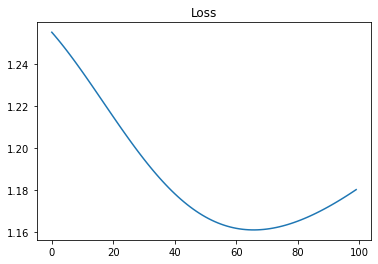

In [32]:

X = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])
y = np.array([[0],[0],[1],[1]])
# Weights = 2*np.random(3,1)-1




single_NN = NN(3,1)

single_NN.train_sgd(X,y)
single_NN.print_weights()
single_NN.print_predict(X)
single_NN.plot_loss()

从上图的 Loss 函数图可以看出，DeltaSGD算法更新系数过于关注单个样本，导致难以达到全局最优点，在600个epochs后，误差开始增大。在prediction中也可以直观看出，四个数据的误差均较大。

## Batch

weights: 
[[ 3.45737593]
 [-0.32199398]
 [-1.42670757]]
prediction: 
[[0.1936122 ]
 [0.14821104]
 [0.88397964]
 [0.84666427]]


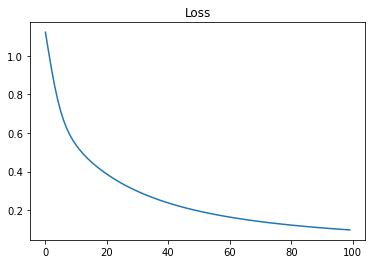

In [33]:
single_NN_batch = NN(3,1)

single_NN_batch.train_batch(X,y)
single_NN_batch.print_weights()
single_NN_batch.print_predict(X)
single_NN_batch.plot_loss()

## MiniBatch

weights: 
[[ 2.14102741]
 [-0.07617744]
 [-0.88278328]]
prediction: 
[[0.29260135]
 [0.27708632]
 [0.7787237 ]
 [0.7653192 ]]


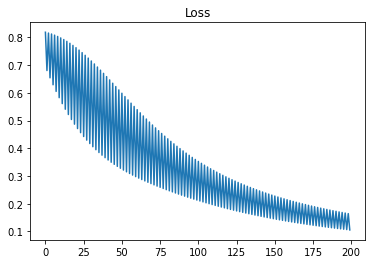

In [34]:
single_NN_mini_batch = NN(3,1)

single_NN_mini_batch.train_mini_batch(X,y)
single_NN_mini_batch.print_weights()
single_NN_mini_batch.print_predict(X)
single_NN_mini_batch.plot_loss()

从图中可以看出，loss曲线出现明显的振荡，说明所选取的每一批次样本都是相互冲突的，导致误差在“振荡”，但是总体是在慢慢收敛。

# 练习二

练习2：结合课堂练习，比较SGD、批量和小批量三种算法学习速度
说明：每种算法学习1000轮，画出“轮-误差”曲线，其中误差=4个实际输出与期望输出之差的平方和。

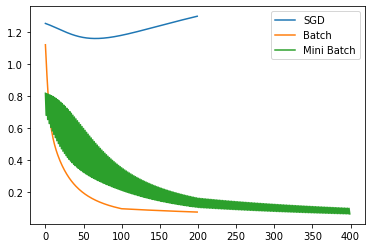

In [35]:
single_NN.train_sgd(X,y,0.01,1000)
single_NN_batch.train_batch(X,y,0.01,1000)
single_NN_mini_batch.train_mini_batch(X,y,0.01,1000)



sgd_loss = single_NN.output_loss()

batch_loss = single_NN_batch.output_loss()

mini_batchLoss = single_NN_mini_batch.output_loss()


plt.plot(sgd_loss, label = 'SGD')
plt.plot(batch_loss, label = 'Batch')
plt.plot(mini_batchLoss, label = 'Mini Batch')
plt.legend()
plt.show()

从上图中可以看出，batch的训练收敛速度最快，而mini batch的方法由于每次选取的数据都相互冲突，所以在不停"振荡"，但是总体在收敛。而SGD算法中属于先收敛到极小值点后停止收敛，随着训练继续导致误差增大。

# 练习3

练习3：用SGD对数据2训练4000轮，给出最终权系数和四个样本的网络输出，验证训练结果是否有效？

weights: 
[[-0.15664556]
 [-0.05448592]
 [ 0.12650542]]
prediction: 
[[0.53158424]
 [0.5179971 ]
 [0.49246554]
 [0.4788561 ]]


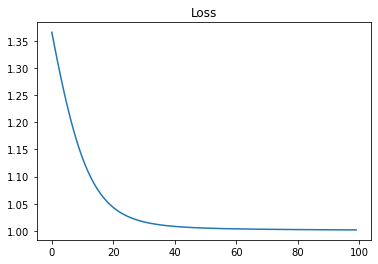

In [40]:
X2 = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
y2 = np.array([[0], [1], [1], [0]])

single_NN_sgd2 = NN(3,1)

single_NN_sgd2.train_sgd(X2,y2,0.005,4000)

single_NN_sgd2.print_weights()
single_NN_sgd2.print_predict(X2)
single_NN_sgd2.plot_loss()

从上图可以看出，虽然loss 曲线已经收敛，但是最好误差依旧为1。从输出结果来看，SGD训练的网络给出的预测为\[0.5,0.5,0.5,0.5\]，该情况下确实是该损失函数所训练出的网络能给出的最好结果。该情况说明：
1. 选取的训练样本不够好
2. 训练方法对于单个数据点过于敏感
3. 损失函数设计的不够完善